In [6]:
%matplotlib inline
import pandas as pd

## Load results

In [8]:
series = [
    'masked',
    'unmasked',
    'masked_reversed',
    'unmasked_reversed',
]
series = [
    'masked',
    'masked_no_symbolic',
    'masked_no_symbolic_no_selective',
    'masked_no_selective',
    'masked_symbolic_low_order',
    'unmasked',
    'unmasked_no_symbolic',
     'masked_reversed',
    'unmasked_reversed',
]
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/analysis_new_property_2_raw_{s}.csv')
   for s in series 
}

## Raw results

In [9]:
from ipywidgets import interact

In [10]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('masked', 'masked_no_symbolic', 'masked_no_symbo…

## Comparison

In [11]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,masked_reversed,unmasked_reversed
Flow*,103.972315,104.096252,104.239559,105.568010,102.218178,104.949374,104.192561,106.459356,106.482574
P,14.099834,17.979025,24.378989,18.902224,12.829657,18.823744,25.668027,14.273737,20.496848
Q,104.652017,33.949078,43.936009,115.834067,37.414636,281.299118,70.575092,121.637607,240.935255
P | F(Q),237.737088,104.086495,136.854072,269.696218,100.715937,601.014715,192.707897,272.050850,523.086635
tentative eval,1.381684,1.316493,1.325381,1.420032,2.286227,3.842709,3.594124,1.366211,3.720935
root detection,0.040639,2.377377,3.069887,0.012975,0.803135,0.052401,5.510207,0.037023,0.046269
composing flowpipe,23.856251,46.865766,62.175760,55.199466,23.298517,42.391887,84.159275,24.217319,41.935212
composing atomic,91.855155,0.011354,0.012545,75.719219,22.995655,250.910396,0.022963,108.274993,212.845219
Total,223.011374,156.319699,172.829018,240.578915,152.737632,405.625821,200.724418,242.648532,368.187120


In [12]:
comparison.to_csv("data/comparison1.csv")

In [13]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,masked_reversed,unmasked_reversed
Flow*,1.715421,1.891099,1.404207,1.997480,1.084653,4.049083,2.048119,1.851725,1.658455
P,0.608156,2.646297,4.456879,0.939043,0.627181,0.904238,3.283719,0.727994,0.757379
Q,7.069482,2.802543,3.565065,6.690971,1.128353,30.229316,4.841744,4.344146,11.604230
P | F(Q),14.711301,7.898518,12.014143,13.107790,2.117443,60.834403,12.961729,8.905697,23.075390
tentative eval,0.071179,0.097760,0.071223,0.129357,0.219224,0.244524,0.147352,0.070033,0.122155
root detection,0.010160,0.177560,0.198585,0.003444,0.010279,0.008907,0.337479,0.010883,0.009125
composing flowpipe,0.589189,3.661671,5.711511,1.829237,0.542534,1.624033,5.923946,0.715280,0.802223
composing atomic,6.902942,0.000662,0.000955,4.980643,0.701656,29.336497,0.001065,3.802747,11.319982
Total,7.417086,3.947386,6.637435,6.188515,1.610825,33.814704,6.175381,4.720884,10.992244


In [14]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,14.099834,104.652017
masked_no_symbolic,17.979025,33.949078
masked_no_symbolic_no_selective,24.378989,43.936009
masked_no_selective,18.902224,115.834067
masked_symbolic_low_order,12.829657,37.414636
unmasked,18.823744,281.299118
unmasked_no_symbolic,25.668027,70.575092
masked_reversed,14.273737,121.637607
unmasked_reversed,20.496848,240.935255


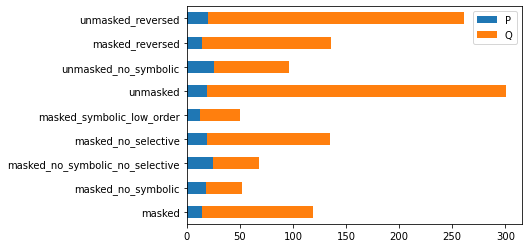

In [15]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [24]:
p.get_figure().savefig('images/comparison-analysis6-bar-chart-1.pdf')

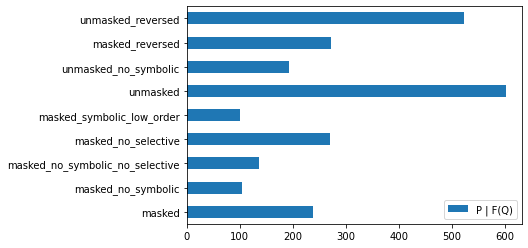

In [17]:
comparison3 = comparison.loc[['P | F(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [18]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q'],:].transpose()
comparison4

,Flow*,P,Q
masked,103.972315,14.099834,104.652017
masked_no_symbolic,104.096252,17.979025,33.949078
masked_no_symbolic_no_selective,104.239559,24.378989,43.936009
masked_no_selective,105.568010,18.902224,115.834067
masked_symbolic_low_order,102.218178,12.829657,37.414636
unmasked,104.949374,18.823744,281.299118
unmasked_no_symbolic,104.192561,25.668027,70.575092
masked_reversed,106.459356,14.273737,121.637607
unmasked_reversed,106.482574,20.496848,240.935255


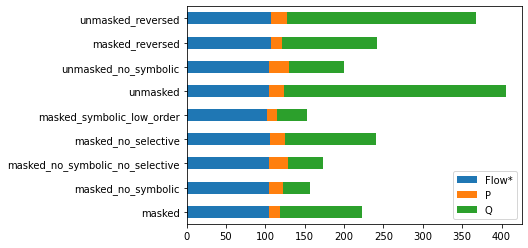

In [19]:
p = comparison4.plot(kind='barh', stacked=True, grid=False)
p

In [25]:
p.get_figure().savefig('images/comparison-analysis6-bar-chart-2.pdf')

In [26]:
comparison5 = comparison4.copy()

In [27]:
rem = comparison.loc['Total', :] - comparison4.sum(axis=1)
rem

masked                             0.287208
masked_no_symbolic                 0.295344
masked_no_symbolic_no_selective    0.274460
masked_no_selective                0.274614
masked_symbolic_low_order          0.275162
unmasked                           0.553586
unmasked_no_symbolic               0.288738
masked_reversed                    0.277831
unmasked_reversed                  0.272443
dtype: float64

In [28]:
comparison5.loc[:,'Remainder'] = rem

In [29]:
comparison5

,Flow*,P,Q,Remainder
masked,103.972315,14.099834,104.652017,0.287208
masked_no_symbolic,104.096252,17.979025,33.949078,0.295344
masked_no_symbolic_no_selective,104.239559,24.378989,43.936009,0.274460
masked_no_selective,105.568010,18.902224,115.834067,0.274614
masked_symbolic_low_order,102.218178,12.829657,37.414636,0.275162
unmasked,104.949374,18.823744,281.299118,0.553586
unmasked_no_symbolic,104.192561,25.668027,70.575092,0.288738
masked_reversed,106.459356,14.273737,121.637607,0.277831
unmasked_reversed,106.482574,20.496848,240.935255,0.272443


In [30]:
comparison5.to_csv("data/comparison-remainder6.csv")

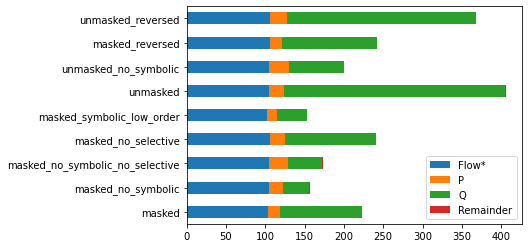

In [31]:
comparison5.plot(kind='barh', stacked=True, grid=False)

In [32]:
_.get_figure().savefig(
    'images/key-comparison-bar-chart-6.pdf')

In [34]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [35]:
comparison6

,Flow*,P,Q,Total
masked,103.972315,14.099834,104.652017,223.011374
masked_no_symbolic,104.096252,17.979025,33.949078,156.319699
masked_no_symbolic_no_selective,104.239559,24.378989,43.936009,172.829018
masked_no_selective,105.568010,18.902224,115.834067,240.578915
masked_symbolic_low_order,102.218178,12.829657,37.414636,152.737632
unmasked,104.949374,18.823744,281.299118,405.625821
unmasked_no_symbolic,104.192561,25.668027,70.575092,200.724418
masked_reversed,106.459356,14.273737,121.637607,242.648532
unmasked_reversed,106.482574,20.496848,240.935255,368.187120


In [36]:
comparison6.to_csv('data/key-comparison6.csv')

In [37]:
comparison3

,P | F(Q)
masked,237.737088
masked_no_symbolic,104.086495
masked_no_symbolic_no_selective,136.854072
masked_no_selective,269.696218
masked_symbolic_low_order,100.715937
unmasked,601.014715
unmasked_no_symbolic,192.707897
masked_reversed,272.050850
unmasked_reversed,523.086635


In [44]:
comparison3.loc['unmasked',:] / comparison3.loc['masked',:]

P | F(Q)    2.528065
dtype: float64

In [45]:
comparison3.loc['unmasked_no_symbolic',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    1.851421
dtype: float64

In [51]:
comparison3.loc['masked',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    2.284034
dtype: float64

In [52]:
comparison3.loc['unmasked',:] / comparison3.loc['unmasked_no_symbolic',:]

P | F(Q)    3.118786
dtype: float64

In [53]:
comparison3.loc['masked_symbolic_low_order',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    0.967618
dtype: float64